

# **Machine Learning With Sklearn**
Performing Logisitic Regression, Decision Tree, and Neural Network using automobile data.  
[Raw Data](https://raw.githubusercontent.com/mpstinnett/Intro-ML/main/ML_With_sklearn/Auto.csv)


## 1.) Load Data into Pandas Dataframe 

In [1]:

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/mpstinnett/Intro-ML/main/ML_With_sklearn/Auto.csv')
print(df.head())
print('\nDimensions of data frame:', df.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dimensions of data frame: (392, 9)


## Data Exploration and Cleaning

### 2.) Using Describe Function

In [2]:
df['mpg'].describe()
# Average = 23.45
# Range = 37

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [3]:
df['weight'].describe()
# Average = 2977.58
# Range = 3527

count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

In [4]:
df['year'].describe()
# Average = 76.01
# Range = 12

count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64

### 3.) Explore Data Types

In [5]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object


Showing off two ways to change data types to categorical using cat.codes and not using cat.codes

In [6]:
# Using cat.codes
df.cylinders = df.cylinders.astype('category').cat.codes
# Not Using cat codes
df.origin = df.origin.astype('category')

Verifiying that the data types actually changed, notice how cylinders is using int8 for numeric factor codes as opposed to origin just being a category.

In [7]:
print(df.dtypes)

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


### 4.) Dealing with NAs

In [8]:
df = df.dropna()
print('\nDimensions of data frame:', df.shape)


Dimensions of data frame: (389, 9)


### 5.) Modify columns

Add a new categorical target column

In [9]:

def CreateMPGHigh(df_row):
  if df_row['mpg']  > 23:
    return 1
  else:
    return 0
df["mpg_high"] = df.apply(CreateMPGHigh, axis=1)
# Chained assingment warning can be safely ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Delete the numeric column the categorical column is based on and unecessary column to make this data set classification ready

In [10]:
df = df.drop(["mpg", "name"], axis=1)
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0
1,4,350.0,165,3693,11.5,70.0,1,0
2,4,318.0,150,3436,11.0,70.0,1,0
3,4,304.0,150,3433,12.0,70.0,1,0
6,4,454.0,220,4354,9.0,70.0,1,0


### 6.) Exploring data with Seaborn Graphs

Catplot on mpg_high

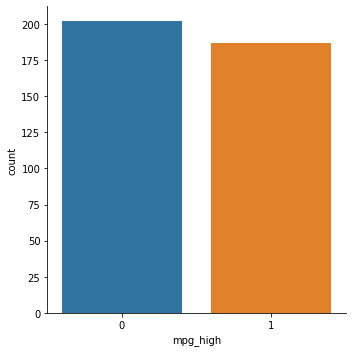

In [11]:
import seaborn as sb
sb.catplot(x="mpg_high", kind='count', data=df)
# There is about 20 more low mpg cars compared to high in the data set. 

Relplot horsepower vs weight with hue and style of mpg_high

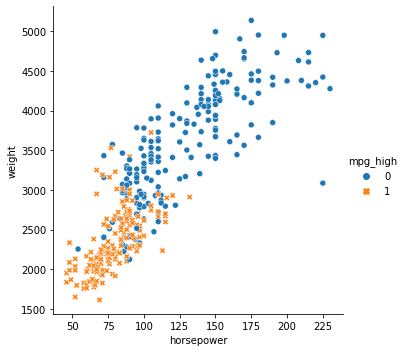

In [12]:
sb.relplot(x='horsepower', y='weight', data=df, hue=df.mpg_high, style=df.mpg_high)
# Low horse power, Low weight cars tend to have better mpg. 

Boxplot mpg_high vs weight

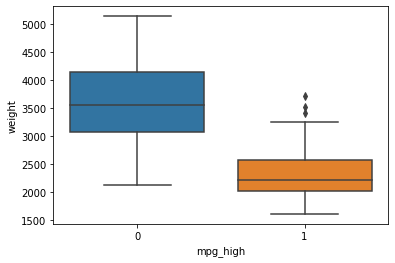

In [13]:
sb.boxplot(x='mpg_high', y='weight', data=df)
# Some outliers exist that have about the same median weight of low mpg cars but still get high mpg. 

## Machine Learning

### 7.) Train/Test split 80/20

In [19]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != "mpg_high"]
y = df.mpg_high

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (311, 7)
test size: (78, 7)


### 8.) Logistic Regression using solver lbfgs

Train the model

In [21]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver='lbfgs', max_iter=1000)
logReg.fit(X_train, y_train)
logReg.score(X_train, y_train)

0.9035369774919614

Test and evaluate

In [28]:
# make prediction
logRegPred = logReg.predict(X_test)

# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(y_test, logRegPred))
print('precision score: ', precision_score(y_test, logRegPred))
print('recall score: ', recall_score(y_test, logRegPred))
print('f1 score: ', f1_score(y_test, logRegPred))

# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, logRegPred)

accuracy score:  0.8717948717948718
precision score:  0.75
recall score:  0.9642857142857143
f1 score:  0.8437499999999999


array([[41,  9],
       [ 1, 27]])

Classifcation Report

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logRegPred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        50
           1       0.75      0.96      0.84        28

    accuracy                           0.87        78
   macro avg       0.86      0.89      0.87        78
weighted avg       0.89      0.87      0.87        78



### 9.) Decision Tree

Train the model


In [29]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

Test and Evaluate

In [31]:
# make predictions

DTpred = DT.predict(X_test)

# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(y_test, DTpred))
print('precision score: ', precision_score(y_test, DTpred))
print('recall score: ', recall_score(y_test, DTpred))
print('f1 score: ', f1_score(y_test, DTpred))

# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, DTpred)

accuracy score:  0.8974358974358975
precision score:  0.8333333333333334
recall score:  0.8928571428571429
f1 score:  0.8620689655172413


array([[45,  5],
       [ 3, 25]])

Classification Report

In [50]:
print(classification_report(y_test, DTpred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        50
           1       0.83      0.89      0.86        28

    accuracy                           0.90        78
   macro avg       0.89      0.90      0.89        78
weighted avg       0.90      0.90      0.90        78



Tree Plot

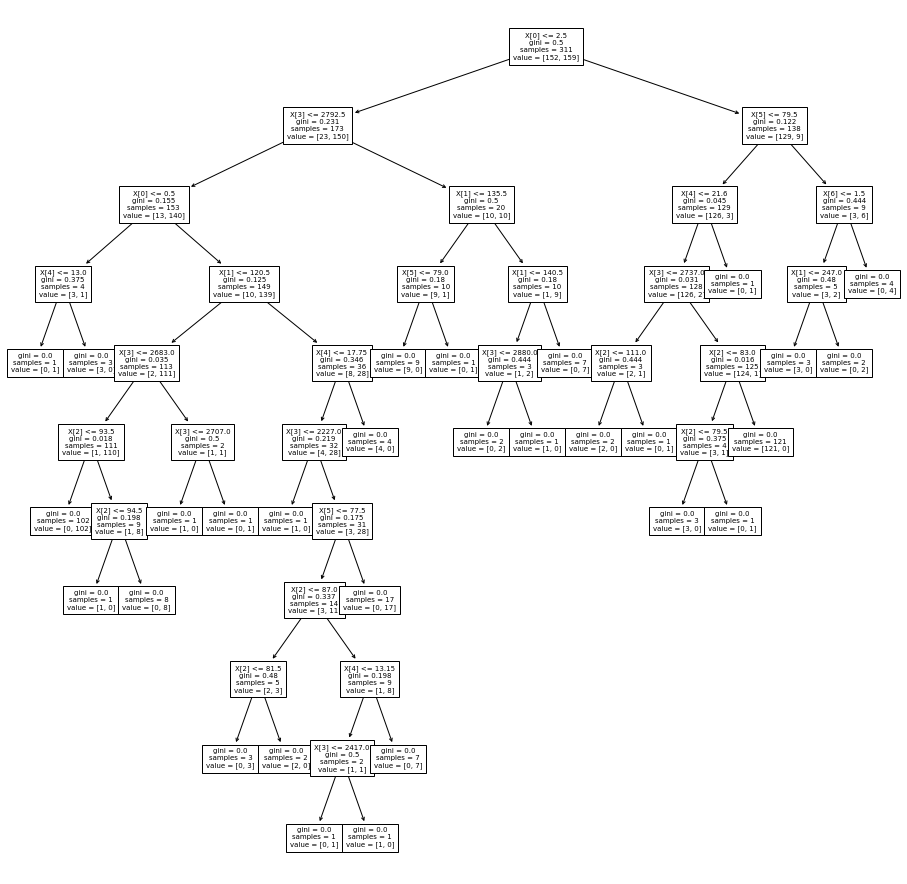

In [44]:
from sklearn import tree
import matplotlib.pyplot as plt
# plot tree
plt.figure(figsize=(16,16))
tree.plot_tree(DT, fontsize=7)
plt.show()

### 10.) Neural Network

Normalize the data

In [45]:
# normalize the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train the first Neural Network (2 Hidden layers of sizes 5 and 2 with 1000 iterations)

In [49]:
# train 
from sklearn.neural_network import MLPClassifier

NN1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2), max_iter=1000, random_state=1234)
NN1.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, random_state=1234,
              solver='lbfgs')

Evaluate the first Neural Network

In [55]:
# make predictions

NN1pred = NN1.predict(X_test_scaled)

# output results
print('accuracy = ', accuracy_score(y_test, NN1pred))
print('confustion matrix = ')
print(confusion_matrix(y_test, NN1pred))
print(classification_report(y_test, NN1pred))

accuracy =  0.8717948717948718
confustion matrix = 
[[42  8]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        50
           1       0.76      0.93      0.84        28

    accuracy                           0.87        78
   macro avg       0.86      0.88      0.87        78
weighted avg       0.89      0.87      0.87        78



Train the second Neural Network (2 Hidden layers of sizes 6 and 3 with 1500 iterations)


In [66]:
# train 
from sklearn.neural_network import MLPClassifier

NN2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(6, 3), max_iter=1000, random_state=1234)
NN2.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(6, 3), max_iter=1000, random_state=1234,
              solver='lbfgs')

Evaluate the second Neural Network

In [67]:
# make predictions

NN2pred = NN2.predict(X_test_scaled)

# output results
print('accuracy = ', accuracy_score(y_test, NN2pred))
print('confustion matrix = ')
print(confusion_matrix(y_test, NN2pred))
print(classification_report(y_test, NN2pred))

accuracy =  0.9102564102564102
confustion matrix = 
[[45  5]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.84      0.93      0.88        28

    accuracy                           0.91        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.91      0.91      0.91        78



**Comparing the two Neural Networks:**  
The second model had better results with 3 more correctly classified low mpgs.
Giving the second model an accuracy of 91% while the first had an accuracy of 87%. I believe the first model was underfitting the data because the only difference between the two was the number of nodes in the two hidden layers. I increased the number of nodes by 1 in each layer. According to the rule of thumb, the hidden layer size should be 2/3 * 7 (input size) + 1 (output size). Which is 5.66. Which rounds better to 6 nodes and not the 5 nodes in the first neural network. Since the first network topology was just a guess, I followed the pattern of adding one node to each hidden layer. That seemed to be the right direction because it resulted in a higher accuracy. 

## 11.) Analysis

**Logistic Regression**   
Accuracy: 87%  
Precision: 75%  
Recall: 96%  
**Decision Tree**   
Accuracy: 90%  
Precision: 83%  
Recall: 89%  
**Neural Network 1**   
Accuracy: 87%  
Precision: 89%  
Recall: 87%  
**Neural Network 2**   
Accuracy: 91%  
Precision: 91%  
Recall: 91%  

**Which algorithm performed better?**  
It seems like the most consistent best performer is Neural Network 2. Even though Logisitic Regression beats it in recall score, overall Neural Network 2 has a better average. 

**Why?**  
Firstly, analysis above explains why Neural Network 2 is performing better than Neural Network 1. I believe a similar reasoning can be given as to why Neural Network 2 performed better than Logistic Regression. Logistic Regression likely underfit the data due to complex non-linear decision boundaries. Neural Networks can shine when the decision boundary is complex. Lastly, we see that Decision Tree is comparable to Neural Network 1 and beats out Logistic Regression. This is more evidence that the decison boundary was not linear. However, with decision tree being a high variance algorithm, a base tree without bagging, boosting, and pruning is prone to poorer performance. Thus, Neural Network works the best here, even though there is not much data. I believe that a bagged tree or random forest would likely be the best algorithm for this case, but was not tested here.  
  
**Sklearn VS R**  
Personally I prefer Sklearn. As a programmer first and a statistician second, I like the freedom of working in a Python environment over being locked in to the statistic focused world of R. Many semantics of R take a bit to get used. Especially the fact that R data structures first index is 1 vs most programming languages starting at 0. However, R studio is a beautiful IDE. I was impressed visually and with how user friendly it is. Also, R studio has a spell checker. I am writing this in google colab, and there is no spell checker, so you will definitely see spelling mistakes in this notebook. 

